In [1]:
import importlib
train = importlib.import_module("3_train")
train_reg = importlib.import_module("3_train_reg")
# import train
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
%matplotlib inline

current_folder = Path("")
dataset_folder = current_folder / "dataset"
images_folder = dataset_folder / "images"
models_folder = current_folder / "models"

X_train, X_test, y_train, y_test = train_reg.load_dataset(dataset_folder)
#X_train, X_test, y_train, y_test = train.load_dataset(dataset_folder)

In [2]:
def print_class(y):
    if y.shape[1] == 1:
        print(f"Left {np.sum(y == -0.25) / len(y):.2f} Straight {np.sum(y == 0.0) / len(y):.2f} Right {np.sum(y == 0.25) / len(y):.2f}")
        print(f"Left {np.sum(y == -0.25)} Straight {np.sum(y == 0.0)} Right {np.sum(y == 0.25)} Total {len(y)}")
    else:
        l_sum, s_sum, r_sum = np.sum(y, axis=0)
        print(f"Left {l_sum/len(y):.2f} Straight {s_sum/len(y):.2f} Right {r_sum/len(y):.2f}")
        print(f"Left {l_sum} Straight {s_sum} Right {r_sum}")

print_class(y_train)


Left 0.20 Straight 0.73 Right 0.07
Left 523 Straight 1921 Right 196 Total 2640


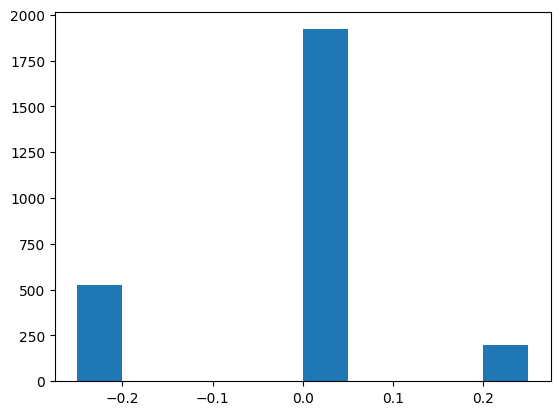

In [3]:
plt.hist(y_train)
plt.show()

c:\Users\Utkarsh\OneDrive\Desktop\Self-Driving-Cars-Course-main\myenv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Utkarsh\OneDrive\Desktop\Self-Driving-Cars-Course-main\myenv\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
c:\Users\Utkarsh\OneDrive\Desktop\Self-Driving-Cars-Course-main\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting L

(array([1921.,    0.,    0.,    0.,    0., 1921.,    0.,    0.,    0.,
        1921.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

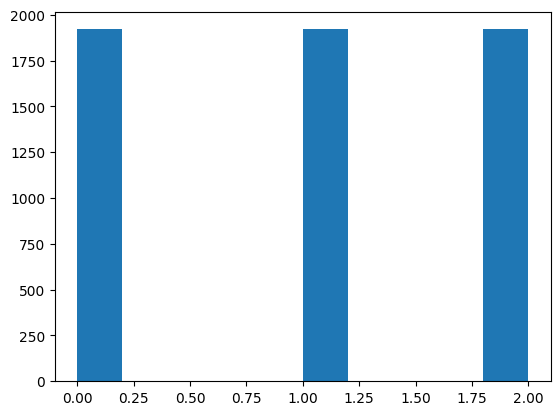

In [4]:
# Balance
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

X_flat = np.reshape(X_train, (X_train.shape[0], int(np.product(X_train.shape) / X_train.shape[0])))

smote = SMOTE(n_jobs=-1)
X_train_os, y_train_os = smote.fit_resample(X_flat, y_train_enc)

X_train_os_rs = np.reshape(X_train_os, tuple([X_train_os.shape[0]]) + X_train.shape[1:])

plt.hist(y_train_os)

#print_class(y_train_os)

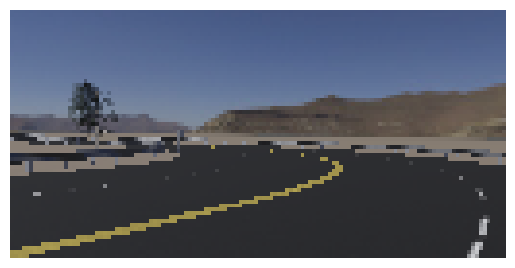

In [7]:
import cv2

def get_image(index):
    image = X_train_os_rs[index]
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

image_rgb = get_image(1000) 

plt.axis("off")
plt.imshow(image_rgb)

rows 20 cols 3


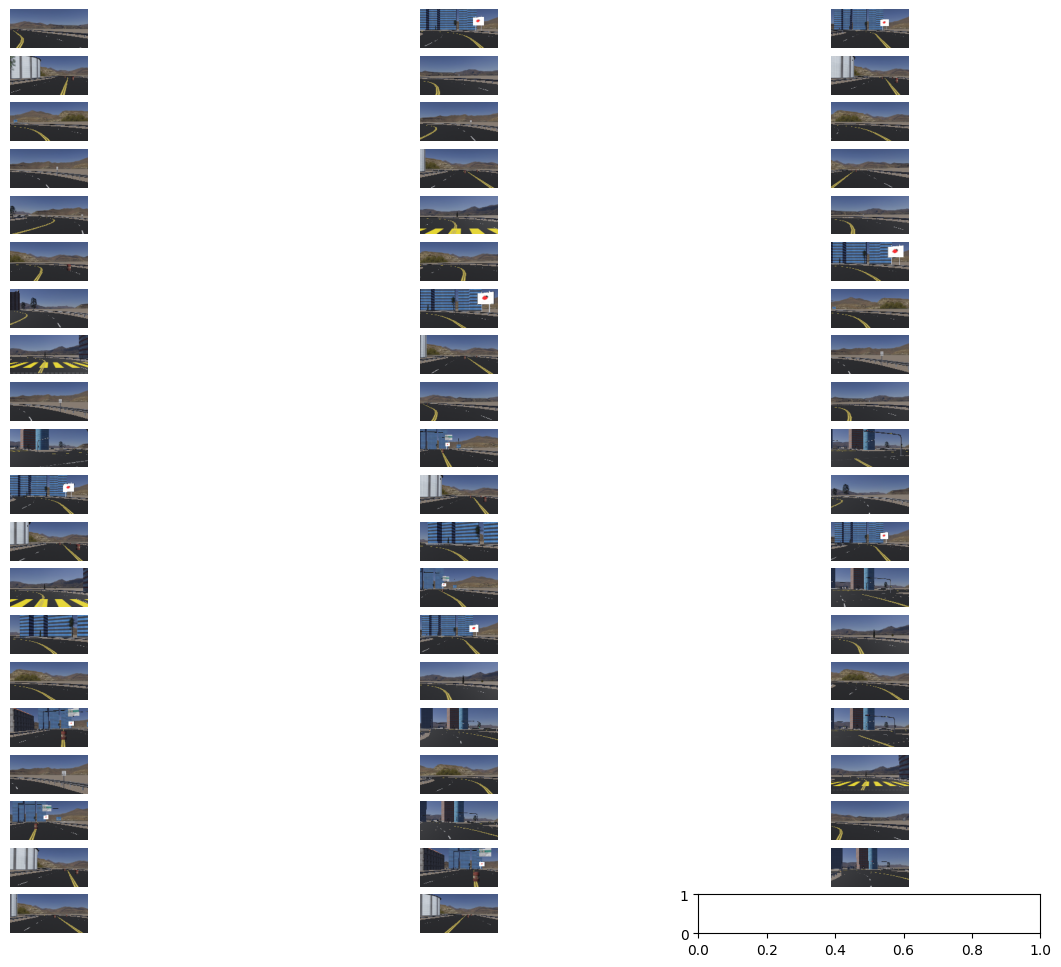

In [9]:
plt.rcParams['figure.figsize'] = [15, 12]

def plot_images(indexes):
    n = len(indexes)
    cols = 3
    rows = int(np.ceil(n / cols))
    print("rows", rows, "cols", cols)
    f, axarr = plt.subplots(rows, cols)
    for i, index in enumerate(indexes):
        r, c = int(np.floor(i / cols)), int(i % cols)
        axarr[r, c].imshow(get_image(index))
        axarr[r, c].axis("off")

# Greater than 23762 are generate by SMOTE
plot_images(list(range(512, 571)))

rows 20 cols 3


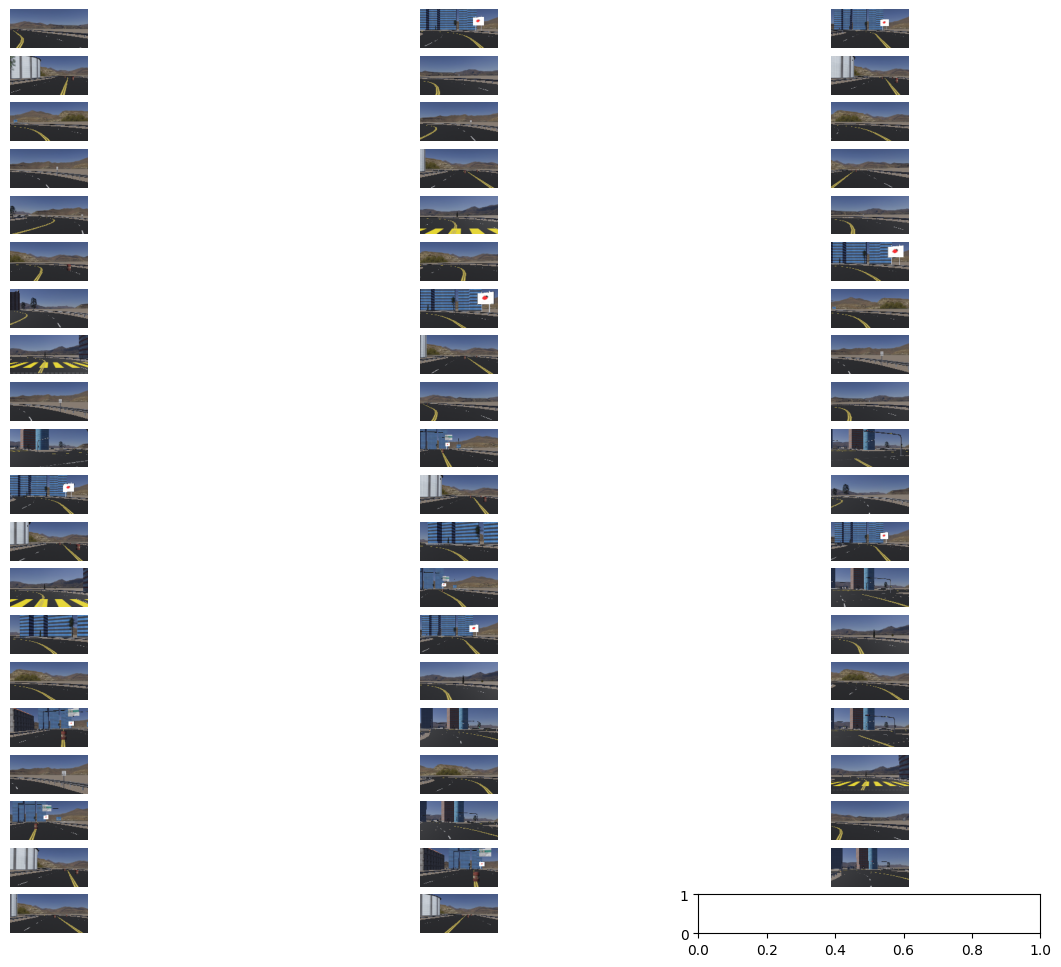

In [10]:
plot_images(list(range(512, 571)))

In [13]:
comparison = X_train_os_rs[:571] == X_train[:571]
np.sum(comparison) / (571 * 64 * 128 * 3)

1.0

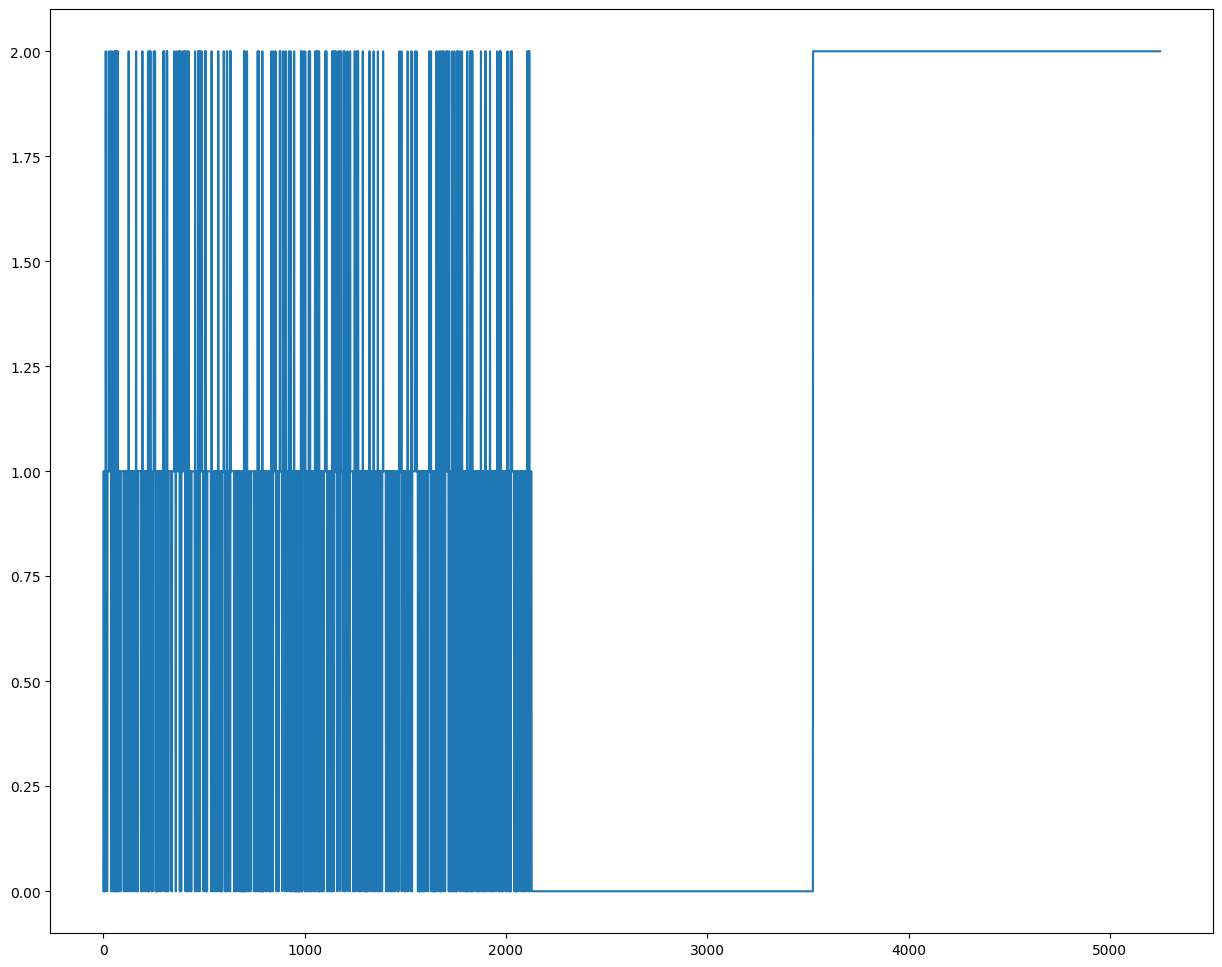

In [14]:
plt.plot(y_train_os[512:]) # sorted